# Relax Inc Take - Home Challenge

**Instructions:** Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­-day period, identify which factors predict future user adoption.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling and Cleaning

In [2]:
# Import user data as pandas df
users_df = pd.read_csv('./relax_challenge/takehome_users.csv', encoding='ISO-8859-1')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
# Import user engagement data as pandas df
user_engagement_df = pd.read_csv('./relax_challenge/takehome_user_engagement.csv', encoding='ISO-8859-1')
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
# Let's explore these datasets by looking for any null values and their summary statistics
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


>We need to convert the time columns into a datetime type. Also, there are null values in the last session creation time column and invited by column, probably for users that created an account but never had a subsequent login and for users that were not invited by another user.  We can fill these null values with a zero.

In [5]:
# Convert the time columns to datetime types and the boolean columns to bool:
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')
users_df['opted_in_to_mailing_list'] = users_df['opted_in_to_mailing_list'].astype('bool')
users_df['enabled_for_marketing_drip'] = users_df['enabled_for_marketing_drip'].astype('bool')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  bool          
 7   enabled_for_marketing_drip  12000 non-null  bool          
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: bool(2), datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 773.6+ KB


In [6]:
# Let's take care of the null values for last session and invited by columns
users_df['last_session_creation_time'].fillna(pd.to_datetime(0, unit='s'), inplace = True)
users_df['invited_by_user_id'].fillna(0, inplace = True)
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].astype('int')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  bool          
 7   enabled_for_marketing_drip  12000 non-null  bool          
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
dtypes: bool(2), datetime64[ns](2), int64(3), object(3)
memory usage: 773.6+ KB


In [7]:
users_df.describe().T

,count,mean,min,25%,50%,75%,max,std
object_id,12000.0,6000.5,1.0,3000.75,6000.5,9000.25,12000.0,3464.24595
creation_time,12000,2013-07-16 13:25:32.964499968,2012-05-31 00:43:27,2013-01-15 21:28:22.750000128,2013-08-05 21:35:19.500000,2014-01-28 10:20:12.249999872,2014-05-30 23:59:19,NaN
last_session_creation_time,12000,2002-02-19 10:38:29.516249984,1970-01-01 00:00:00,1970-01-01 00:00:00,2013-05-18 12:31:21.500000,2014-03-02 02:49:31.750000128,2014-06-06 14:58:50,NaN
org_id,12000.0,141.884583,0.0,29.0,108.0,238.25,416.0,124.056723
invited_by_user_id,12000.0,3188.691333,0.0,0.0,875.0,6317.0,11999.0,3869.027693


In [8]:
# Let's do the same for the user engagement df
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
# time_stamp should be a datetime type
user_engagement_df['time_stamp'] = pd.to_datetime(user_engagement_df['time_stamp'])
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
# There aren't any null values, so let's look at the summary stats
user_engagement_df.describe().T

,count,mean,min,25%,50%,75%,max,std
time_stamp,207917,2013-10-30 05:06:45.648763648,2012-05-31 08:20:06,2013-07-16 20:17:21,2013-12-03 06:38:34,2014-03-13 08:00:24,2014-06-06 14:58:50,NaN
user_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
visited,207917.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### EDA and Feature Engineering

Our goal is to identify the factors that predict future user adoption, so we need to analyze which users are considered "adopted" and create a boolean feature that indicates whether that user is adopted or not.

In [11]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


>I'm going to create a function to look through each user_id, create a list of their logins, and determine if any of those logins satisfy the parameters of being an adopted user or not.  If the user is adopted it will return a 1 if not it will return a 0.

In [12]:
# The below code will loop through the user engagement df and determine if a user is adopted.

# Initiate a dictionary to store whether the user has adopted (1) or not (0)
user_adoption_dict = {}

# Create a dataframe of number of logins per user and a list of users who have logged in 3 or more times
user_engagement_count = user_engagement_df.groupby('user_id')['user_id'].count().reset_index(name = 'count')
users_with_3ormore_logins = user_engagement_count[user_engagement_count['count'] >=3]['user_id']

# Iterate through each user and store their adoption information accordingly
for user in np.sort(users_df['object_id'].unique()):
    if user not in users_with_3ormore_logins:
        user_adoption_dict[user] = 0
    else:
        # Create an array containing the login times of the user and a variable called adopted initially set to 0
        user_logins = np.sort(user_engagement_df[user_engagement_df['user_id'] == user]['time_stamp'])
        adopted = 0

        # Iterate through the login list for each user and determine if there were three or more logins within a seven day period
        for i in range(len(user_logins)-2):
            
            # If three logins are less than 7 days apart, adopted will be set equal to 1
            if ((user_logins[i+2] - user_logins[i]) / np.timedelta64(1, 'D')) <= 7:
                adopted = 1
                break

        # Set the value for the user in the dictionary to the adopted value
        user_adoption_dict[user] = adopted
            

In [13]:
# We'll now need to append the adopted information to the user dataset

# First, let's make a dataframe out of the user_adoption_dict
user_adoption_df = pd.DataFrame.from_dict(user_adoption_dict, orient = 'index')
user_adoption_df.reset_index(inplace = True)
user_adoption_df.rename(columns = {'index':'user_id', 0:'adopted'},inplace=True)
user_adoption_df['adopted'] = user_adoption_df['adopted'].astype('bool')
user_adoption_df.head()

# Now, let's join that to the users_df dataset
users_df = pd.merge(users_df, user_adoption_df, how = 'left', left_on = 'object_id', right_on = 'user_id').drop(columns = ['user_id'])
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240,False


In [14]:
# Let's create a feature that indicates how many times the user has logged in
for user in users_df['object_id'].values:
    if user in user_engagement_count['user_id'].values:
        login_count = user_engagement_count.loc[user_engagement_count['user_id'] == user,'count'].values[0]
        users_df.loc[users_df['object_id'] == user,'login_count'] = login_count
    else:
        users_df.loc[users_df['object_id'] == user,'login_count'] = 0
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,login_count
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803,False,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316,False,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525,False,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151,False,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240,False,1.0


In [15]:
# Let's create a feature that shows the timedelta between creation time and last session
users_df['timedelta_first_last_login'] = users_df['last_session_creation_time'] - users_df['creation_time']
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,login_count,timedelta_first_last_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803,False,1.0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316,False,14.0,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525,False,1.0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151,False,1.0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240,False,1.0,5 days


In [16]:
# Let's create a boolean feature to indicate whether the user was invited by another user or not
for user in users_df['object_id'].values:
    
    if (users_df.loc[users_df['object_id'] == user,'invited_by_user_id'] == 0).iloc[0]:
        users_df.loc[users_df['object_id'] == user, 'invited'] = 0
    else:
        users_df.loc[users_df['object_id'] == user,'invited'] = 1
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,login_count,timedelta_first_last_login,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803,False,1.0,0 days,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316,False,14.0,136 days,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525,False,1.0,0 days,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151,False,1.0,1 days,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240,False,1.0,5 days,1.0


In [17]:
# Convert the new 'invited' column to a boolean type:
users_df['invited'] = users_df['invited'].astype('bool')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  12000 non-null  datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  bool           
 7   enabled_for_marketing_drip  12000 non-null  bool           
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          12000 non-null  int64          
 10  adopted                     12000 non-null  bool           
 11  login_count                 12000 non-nul

In [18]:
# Let's see the summary statistics of all the new features
users_df.describe().T

,count,mean,min,25%,50%,75%,max,std
object_id,12000.0,6000.5,1.0,3000.75,6000.5,9000.25,12000.0,3464.24595
creation_time,12000,2013-07-16 13:25:32.964499968,2012-05-31 00:43:27,2013-01-15 21:28:22.750000128,2013-08-05 21:35:19.500000,2014-01-28 10:20:12.249999872,2014-05-30 23:59:19,NaN
last_session_creation_time,12000,2002-02-19 10:38:29.516249984,1970-01-01 00:00:00,1970-01-01 00:00:00,2013-05-18 12:31:21.500000,2014-03-02 02:49:31.750000128,2014-06-06 14:58:50,NaN
org_id,12000.0,141.884583,0.0,29.0,108.0,238.25,416.0,124.056723
invited_by_user_id,12000.0,3188.691333,0.0,0.0,875.0,6317.0,11999.0,3869.027693
login_count,12000.0,17.326417,0.0,0.0,1.0,1.0,606.0,64.287839
timedelta_first_last_login,12000,-4166 days +21:12:56.551750016,-16221 days +01:25:29,-15541 days +06:40:18.249999872,0 days 00:00:00,3 days 00:00:00,729 days 00:00:00,7042 days 00:58:42.777550208


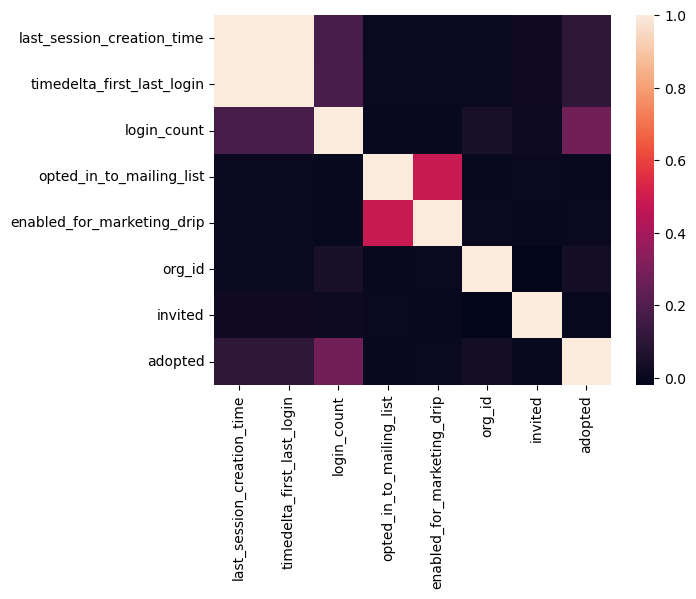

In [19]:
# Let's create a correlation heatmap between the variables to see if we can spot any correlations
users_df_corr = users_df[['last_session_creation_time', 'timedelta_first_last_login','login_count','opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited', 'adopted']].corr()
sns.heatmap(users_df_corr)
plt.show()

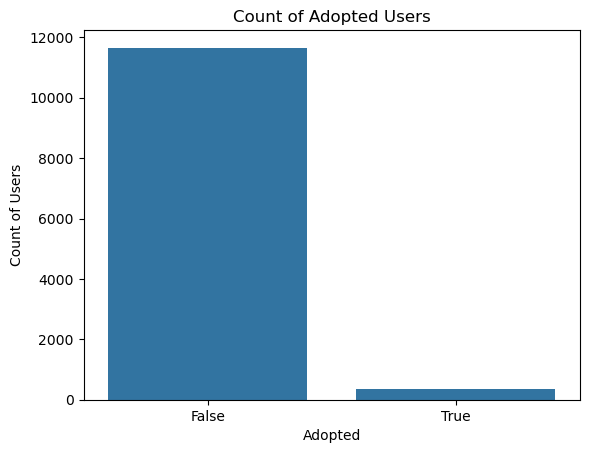

In [20]:
# Let's plot some features to get a sense of the variables

sns.countplot(data = users_df, x = 'adopted')
plt.xlabel('Adopted')
plt.ylabel('Count of Users')
plt.title('Count of Adopted Users')
plt.show()

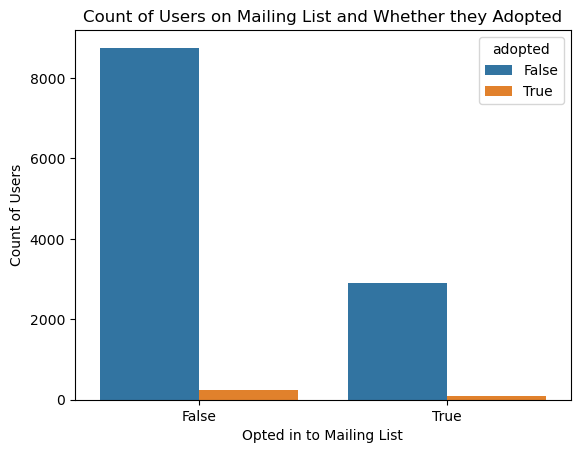

In [21]:
sns.countplot(data = users_df, x = 'opted_in_to_mailing_list', hue = 'adopted')
plt.title('Count of Users on Mailing List and Whether they Adopted')
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Count of Users')
plt.show()

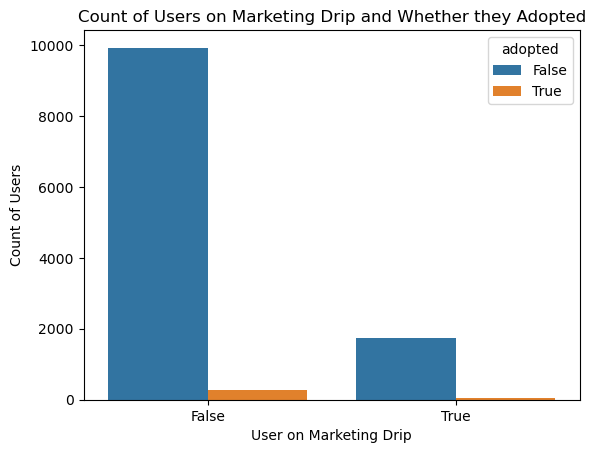

In [22]:
sns.countplot(data = users_df, x = 'enabled_for_marketing_drip', hue = 'adopted')
plt.title('Count of Users on Marketing Drip and Whether they Adopted')
plt.xlabel('User on Marketing Drip')
plt.ylabel('Count of Users')
plt.show()

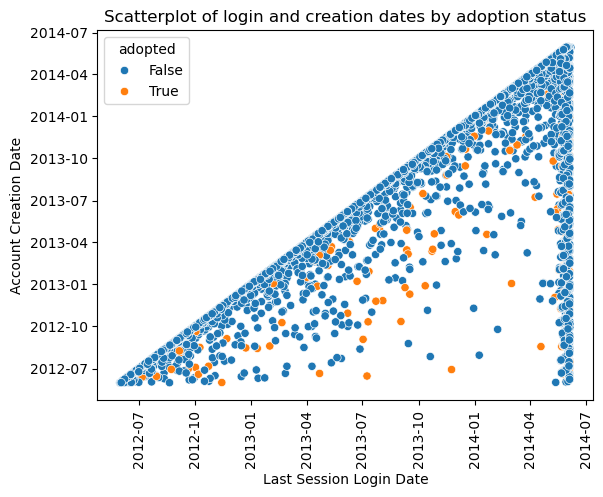

In [23]:
# Let's plot a timeseries of when the user created the account and when they last accessed the account and color code by their adoption status
sns.scatterplot(data = users_df[users_df['last_session_creation_time'].dt.year > 1970], x = 'last_session_creation_time', y = 'creation_time', hue = 'adopted')
plt.xlabel('Last Session Login Date')
plt.ylabel('Account Creation Date')
plt.title('Scatterplot of login and creation dates by adoption status')
plt.xticks(rotation = 90)
plt.show()

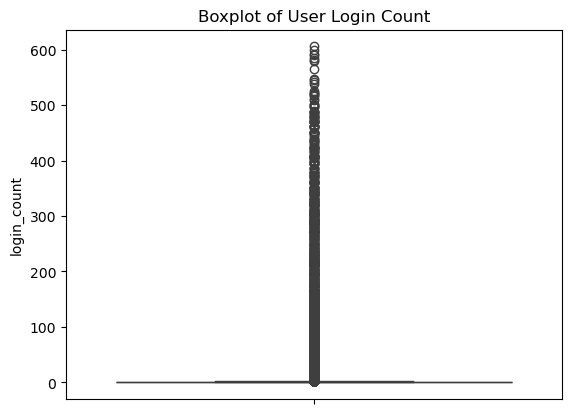

In [24]:
# Let's see the boxplot of login counts
sns.boxplot(users_df['login_count'])
plt.title('Boxplot of User Login Count')
plt.show()

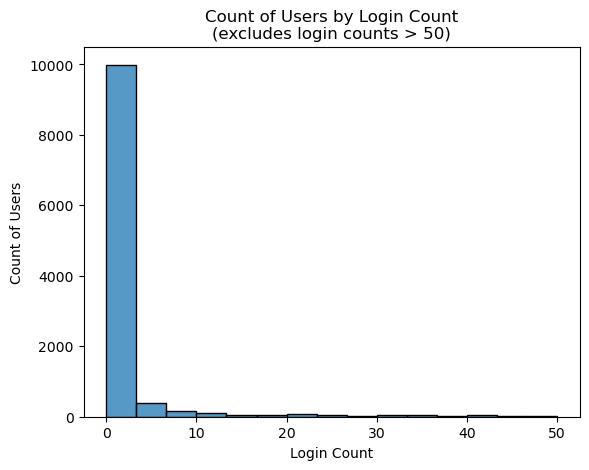

In [25]:
# There are a significant number of outliers.  Let's plot this in a histogram excluding the major outliers
sns.histplot(users_df[users_df['login_count'] <= 50]['login_count'], bins = 15)
plt.title('Count of Users by Login Count\n(excludes login counts > 50)')
plt.xlabel('Login Count')
plt.ylabel('Count of Users')
plt.show()

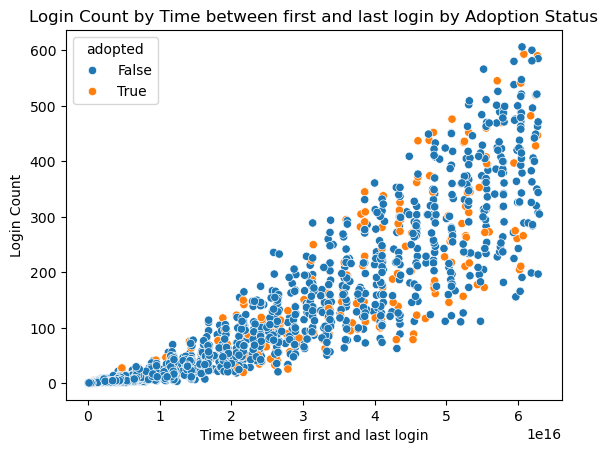

In [26]:
sns.scatterplot(data = users_df[users_df['timedelta_first_last_login'].dt.days >0], x = 'timedelta_first_last_login', y = 'login_count', hue = 'adopted')
plt.xlabel('Time between first and last login')
plt.ylabel('Login Count')
plt.title('Login Count by Time between first and last login by Adoption Status')
plt.show()

### Preprocessing

In [27]:
# Let's create dummy variables for the creation source column
users_df_dummies = pd.get_dummies(users_df, columns = ['creation_source'])
users_df_dummies.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,login_count,timedelta_first_last_login,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,True,False,11,10803,False,1.0,0 days,True,True,False,False,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,False,False,1,316,False,14.0,136 days,True,False,True,False,False,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,False,False,94,1525,False,1.0,0 days,True,False,True,False,False,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,False,False,1,5151,False,1.0,1 days,True,True,False,False,False,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,False,False,193,5240,False,1.0,5 days,True,True,False,False,False,False


In [28]:
# Let's confine the dataset to only numeric / boolean features:
users_df_dummies_numeric = users_df_dummies.drop(columns = ['object_id', 'name', 'email', 'creation_time', 'last_session_creation_time'])
users_df_dummies_numeric['timedelta_first_last_login'] = users_df_dummies_numeric['timedelta_first_last_login'].dt.days.astype('int')
users_df_dummies_numeric.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,login_count,timedelta_first_last_login,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,True,False,11,10803,False,1.0,0,True,True,False,False,False,False
1,False,False,1,316,False,14.0,136,True,False,True,False,False,False
2,False,False,94,1525,False,1.0,0,True,False,True,False,False,False
3,False,False,1,5151,False,1.0,1,True,True,False,False,False,False
4,False,False,193,5240,False,1.0,5,True,True,False,False,False,False


### Modeling

In [29]:
# Lets start with a random forest model to predict user adoption
# Importing the necessary modules

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# Let's create our X and y variables:
X = users_df_dummies_numeric.drop(columns = ['adopted'])
y = users_df_dummies_numeric['adopted']

In [31]:
# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y, random_state=42)

In [32]:
# Let's train a model and see our results
rf = RandomForestClassifier(n_estimators=300, class_weight= 'balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

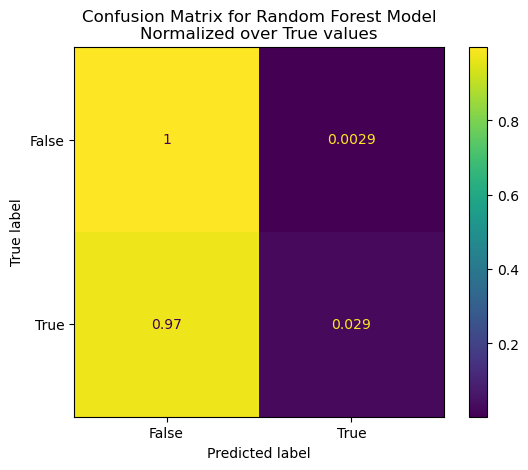

In [33]:
# Let's plot a confusion matrix to see how the model performed
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
disp.plot()
plt.title('Confusion Matrix for Random Forest Model\nNormalized over True values')
plt.show()

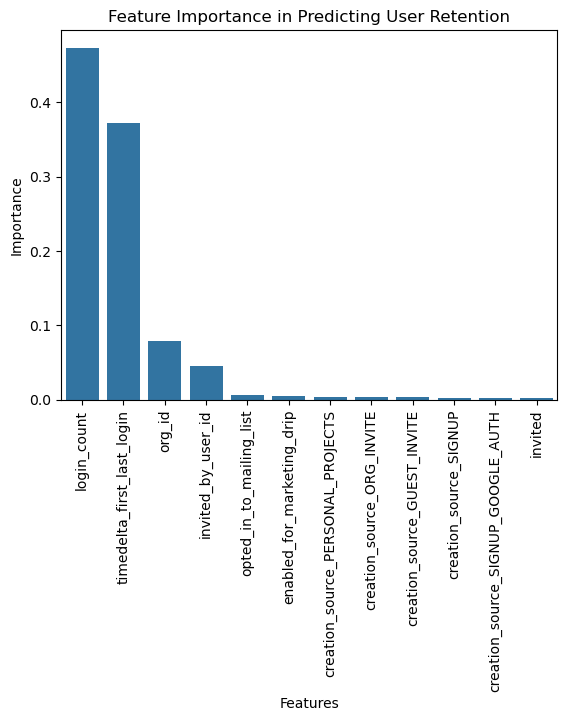

In [34]:
feature_importance_df = pd.DataFrame({'feature':rf.feature_names_in_,'importance':rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by = 'importance', ascending = False)
sns.barplot(data = feature_importance_df, x = 'feature', y = 'importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting User Retention')
plt.xticks(rotation = 90)
plt.show()

In [35]:
# Let's conduct a grid search to optimize recall
# I'm commenting this cell out since it takes a long time to run
# rf = RandomForestClassifier(class_weight='balanced')
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'recall', cv = 5)
# grid_search.fit(X_train, y_train)

In [36]:
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best recall: {grid_search.best_score_}")

In [37]:
# Let's build a model based on the best parameters from the grid search
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=4, min_samples_split=10, max_depth=10, class_weight= 'balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

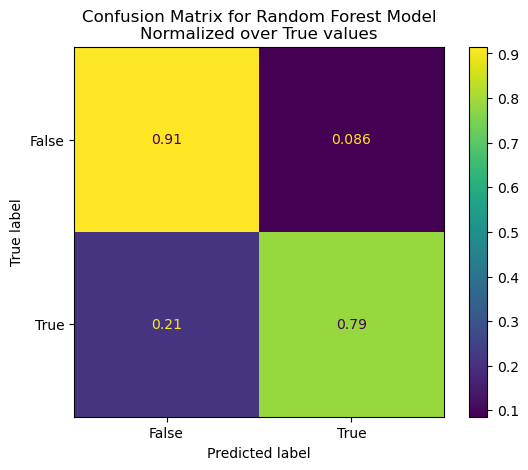

In [38]:
# Let's plot a confusion matrix to see how the model performed
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
disp.plot()
plt.title('Confusion Matrix for Random Forest Model\nNormalized over True values')
plt.show()

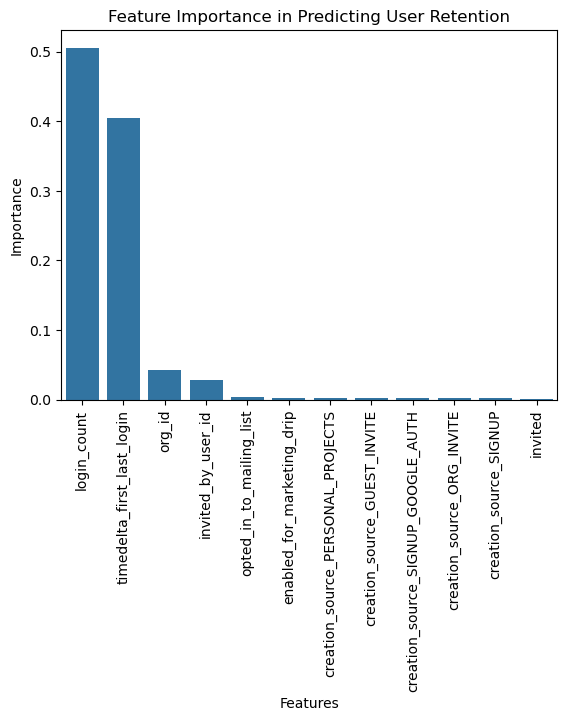

In [39]:
feature_importance_df = pd.DataFrame({'feature':rf.feature_names_in_,'importance':rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by = 'importance', ascending = False)
sns.barplot(data = feature_importance_df, x = 'feature', y = 'importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting User Retention')
plt.xticks(rotation = 90)
plt.show()

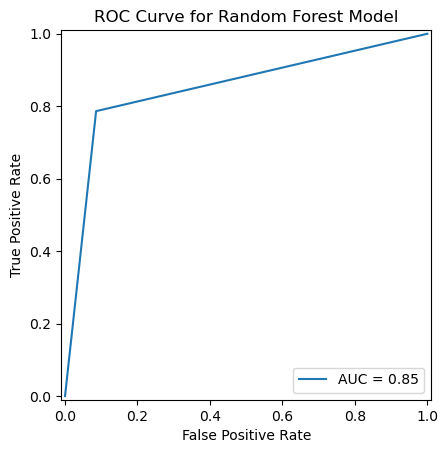

In [40]:
# Let's plot the ROC curve to look at AUC
fpr, tpr, thresholds  = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=auc)
disp.plot()
plt.title('ROC Curve for Random Forest Model')
plt.show()

In [41]:
# Let's gather the remaining evaluation metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Accuracy:  {accuracy:0.2f}')
print(f'Precision: {precision:0.2f}')
print(f'Recall:    {recall:0.2f}')
print(f'F1 Score:  {f1:0.2f}')

Accuracy:  0.91
Precision: 0.21
Recall:    0.79
F1 Score:  0.33


### Summary

The initial analysis of Relax Inc users revealed the following key insights:
1. **This is an unbalanced dataset:** Most users did not adopt the product which created a significant imbalance among the target feature.  While this model achieved pretty good recall (out of the users that actually adopted the product, the model was able to correctly identify ~80% of them) the model had pretty poor precision (out of the total users that the model predicted would adopt, only ~20% of them actually did). More refinement can be done to improve this. We can try stratified kfolds or resampling techniques to reduce the impact of the imbalance.
2. **The count of logins is an important predictor of adoption:** This makes intuitive sense, and the model backs it up.  Tracking the user's login activity will help predict whether the user will adopt the product or not.  I would like to have a discussion with the business unit about refining the definition of adoption. Defining adoption as 3 or more logins within any 7 day period does not seem like a good defition of adoption and could be preventing the business from gaining real insights about which customers actually stick around long term.
3. **Adopted User Behavior Varies Widely:** Mostly because of how user-adoption is defined, the behavior of adopted users varies widely.  A near-even split of adopted users were on the email drip vs not as well as opting in to marketing materials.  Similarly there was a wide array of time deltas between first and last logins for adopted users and the number of login-counts varied greatly.

In conclusion, I think the definition of an adopted user should be revisited.  This will help us refine what we're looking for, get more insights into the consumer behavior that will predict whether customers continue using the product, and allow us to target in marketing campains the most promising customers.